# Competicao 1 de Inteligencia Computacional

Foi dado um dataset sobre a aprovacao de pedidos de cobertura dos planos de saude. Visando uma economia para as empresas foi pedido para que um modelo fosse capaz de prever a liberacao ou nao dos beneficios.

## Inicializacao do Codigo

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import seaborn as sns

In [4]:
df_treino = pd.read_csv('/content/drive/MyDrive/11P/IC/Competicao1/train.csv',index_col=0)

In [5]:
print(df_treino.shape)
df_treino.head()

(227122, 31)


,NR_SEQ_REQUISICAO,NR_SEQ_ITEM,DT_REQUISICAO,DS_TIPO_GUIA,DT_NASCIMENTO,NR_PRODUTO,DS_TIPO_PREST_SOLICITANTE,DS_CBO,DS_TIPO_CONSULTA,QT_TEMPO_DOENCA,...,CD_CID,DS_INDICACAO_CLINICA,DS_TIPO_ITEM,CD_ITEM,DS_ITEM,DS_CLASSE,DS_SUBGRUPO,DS_GRUPO,QT_SOLICITADA,DS_STATUS_ITEM
1,1120527,2905946,2459367,Guia de solicitac?o SP/SADT,2439348.0,1,PRESTADOR DE SERVICOS,Medico dermatologista,NaN,NaN,...,NaN,INDICACAO CLINICA EM ANEXO.,Procedimentos,30101298,ELETROCOAGULAC?O DE LES?ES DE PELE E MUCOSAS -...,PROCEDIMENTOS,PELE E TECIDO CELULAR SUBCUTANEO/ANEXOS,PROCED. CIRURGICOS E INVASIVOS,1.0,Autorizado
2,615210,1333736,2459091,Guia de solicitac?o internac?o,2443536.0,1,HOSPITAL,Medico clinico,NaN,NaN,...,B342,Paciente positivo para COVID 19 ha 10 dias com...,Procedimentos,10102019,VISITA HOSPITALAR A PACIENTE INTERNADO,VISITAS,CONSULTAS,PROCED. GERAIS,1.0,Autorizado
4,1135757,897098,2459375,Guia de solicitac?o SP/SADT,2439815.0,1,CLINICA,Medico ortopedista e traumatologista,NaN,NaN,...,M16,DOR CRONICA NO QUADRIL E COLUNA LOMBAR,MAT/MED,37765,NAUSEDRON 2 MG/ML SOL INJ CX 50 AMP VD INC X 2...,ANTIEMETICOS E ANTINAUSEANTES,"SISTEMA DIGESTIVO, METABOLISMO E NUTRICAO+SIST...",Brasindice,1.0,Autorizado
6,1088493,2800174,2459352,Guia de solicitac?o SP/SADT,2439139.0,1,CLINICA DE IMAGEM,Medico oncologista clinico,NaN,NaN,...,NaN,PANCREATITE DE REPETIC?O,Procedimentos,41101170,"RM - ABDOME SUPERIOR (FIGADO, PANCREAS, BACO, ...",RESSONANCIA MAGNETICA DIAGNOSTICA,RESSONANCIA MAGNETICA,PROCED. DIAGNOSTICOS E TERAPEUTICOS,1.0,Autorizado
7,936746,2311078,2459268,Guia de solicitac?o SP/SADT,2435595.0,1,CLINICA,Medico oftalmologista,NaN,NaN,...,NaN,NaN,Procedimentos,41301269,MICROSCOPIA ESPECULAR DE CORNEA - MONOCULAR,PROCEDIMENTOS,EXAMES ESPECIFICOS,PROCED. DIAGNOSTICOS E TERAPEUTICOS,2.0,Negado


In [6]:
df_treino.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 227122 entries, 1 to 413265
Data columns (total 31 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   NR_SEQ_REQUISICAO          227122 non-null  int64  
 1   NR_SEQ_ITEM                227122 non-null  int64  
 2   DT_REQUISICAO              227122 non-null  int64  
 3   DS_TIPO_GUIA               227122 non-null  object 
 4   DT_NASCIMENTO              227112 non-null  float64
 5   NR_PRODUTO                 227122 non-null  int64  
 6   DS_TIPO_PREST_SOLICITANTE  227122 non-null  object 
 7   DS_CBO                     227122 non-null  object 
 8   DS_TIPO_CONSULTA           10511 non-null   object 
 9   QT_TEMPO_DOENCA            266 non-null     float64
 10  DS_UNIDADE_TEMPO_DOENCA    266 non-null     object 
 11  DS_TIPO_DOENCA             531 non-null     object 
 12  DS_INDICACAO_ACIDENTE      209539 non-null  object 
 13  DS_TIPO_SAIDA              0 

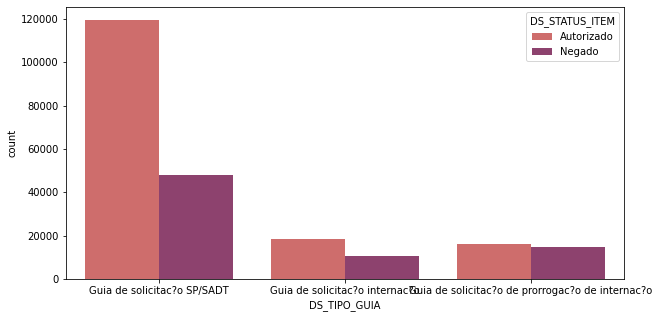

In [7]:
plt.figure(figsize=(10,5))
sns.countplot(x='DS_TIPO_GUIA',data=df_treino,palette='flare',hue='DS_STATUS_ITEM')

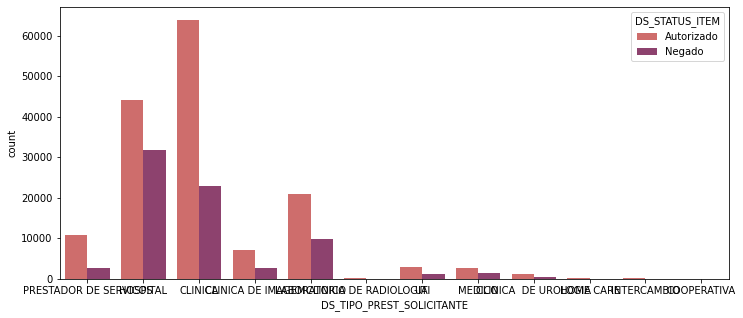

In [8]:
plt.figure(figsize=(12,5))
sns.countplot(x='DS_TIPO_PREST_SOLICITANTE',data=df_treino,palette='flare',hue='DS_STATUS_ITEM')

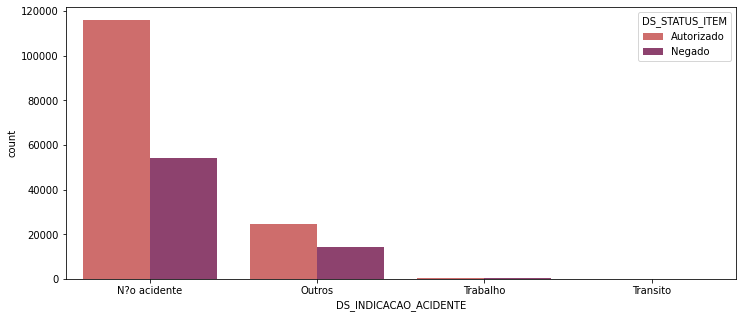

In [9]:
plt.figure(figsize=(12,5))
sns.countplot(x='DS_INDICACAO_ACIDENTE',data=df_treino,palette='flare',hue='DS_STATUS_ITEM')

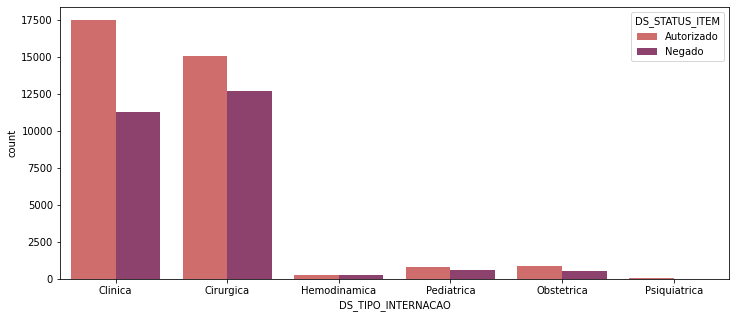

In [10]:
plt.figure(figsize=(12,5))
sns.countplot(x='DS_TIPO_INTERNACAO',data=df_treino,palette='flare',hue='DS_STATUS_ITEM')

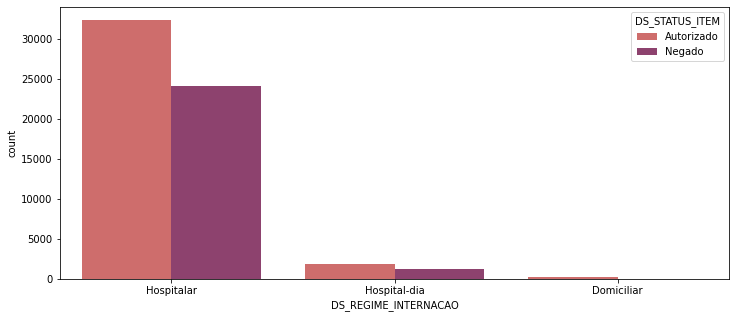

In [11]:
plt.figure(figsize=(12,5))
sns.countplot(x='DS_REGIME_INTERNACAO',data=df_treino,palette='flare',hue='DS_STATUS_ITEM')

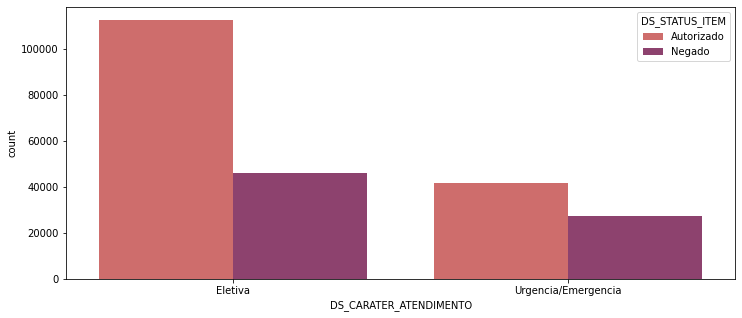

In [12]:
plt.figure(figsize=(12,5))
sns.countplot(x='DS_CARATER_ATENDIMENTO',data=df_treino,palette='flare',hue='DS_STATUS_ITEM')

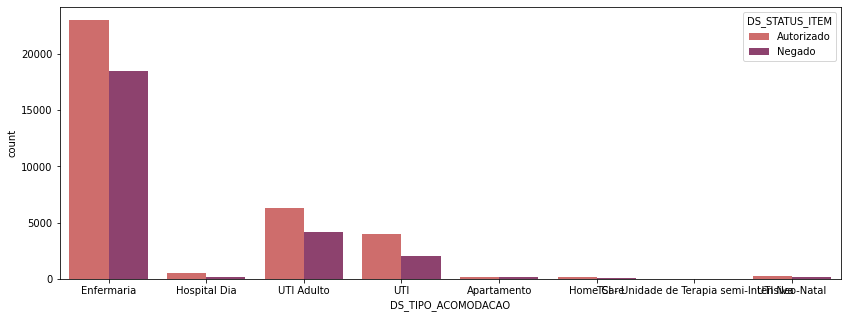

In [13]:
plt.figure(figsize=(14,5))
sns.countplot(x='DS_TIPO_ACOMODACAO',data=df_treino,palette='flare',hue='DS_STATUS_ITEM')

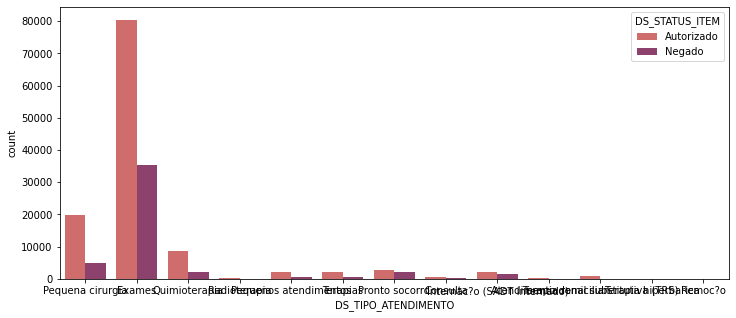

In [14]:
plt.figure(figsize=(12,5))
sns.countplot(x='DS_TIPO_ATENDIMENTO',data=df_treino,palette='flare',hue='DS_STATUS_ITEM')

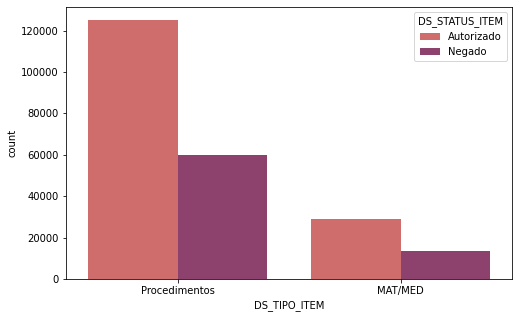

In [15]:
plt.figure(figsize=(8,5))
sns.countplot(x='DS_TIPO_ITEM',data=df_treino,palette='flare',hue='DS_STATUS_ITEM')

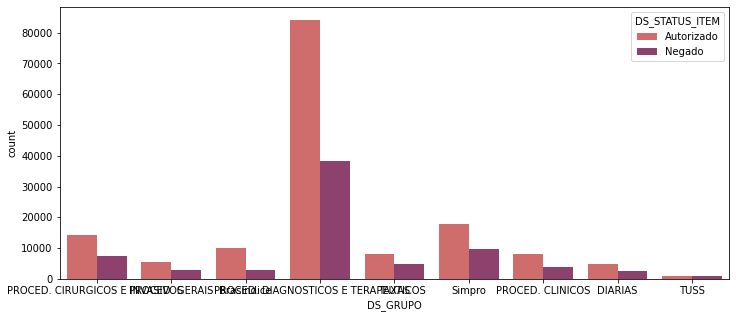

In [16]:
plt.figure(figsize=(12,5))
sns.countplot(x='DS_GRUPO',data=df_treino,palette='flare',hue='DS_STATUS_ITEM')

<Figure size 576x864 with 0 Axes>

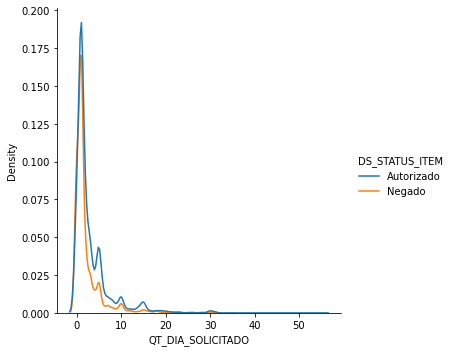

In [17]:
plt.figure(figsize=(8,12))
sns.displot(
    data=df_treino,x='QT_DIA_SOLICITADO',kind='kde',hue='DS_STATUS_ITEM'
)

## Preprocessamento de dados

### Dropar Colunas que nao serao usadas

In [18]:
#Lista com nome das colunas que serao dropadas
colunas_dropadas = ['NR_SEQ_REQUISICAO','NR_SEQ_ITEM','DT_REQUISICAO',
                    'NR_PRODUTO','DS_CBO','DS_TIPO_CONSULTA','QT_TEMPO_DOENCA',
                    'DS_UNIDADE_TEMPO_DOENCA','DS_TIPO_DOENCA',
                    'DS_TIPO_SAIDA','CD_GUIA_REFERENCIA','DS_INDICACAO_CLINICA',
                    'CD_ITEM','DS_ITEM','DS_CLASSE','DS_SUBGRUPO','CD_CID',
                    'DT_NASCIMENTO']

In [19]:
df_treino = df_treino.drop(columns=colunas_dropadas)

### Inserir Valores em Colunas faltantes

In [20]:
#Dicionario com as colunas que precisam ser adicionadas e seus valores
dicio = {'DS_INDICACAO_ACIDENTE': 'Indefinido',
         'DS_TIPO_INTERNACAO': 'Indefinido',
         'DS_REGIME_INTERNACAO': 'Indefinido',
         'DS_TIPO_ACOMODACAO': 'Indefinido',
         'QT_DIA_SOLICITADO': 0,
         'DS_TIPO_ATENDIMENTO': 'Indefinido'}

In [21]:
df_treino = df_treino.fillna(value=dicio)

### Discretizar categoricos


In [22]:
colunas_label_encoder = ['DS_TIPO_GUIA',
                         'DS_TIPO_PREST_SOLICITANTE',
                         'DS_INDICACAO_ACIDENTE',
                         'DS_TIPO_INTERNACAO',
                         'DS_REGIME_INTERNACAO',
                         'DS_CARATER_ATENDIMENTO',
                         'DS_TIPO_ACOMODACAO',
                         'DS_TIPO_ATENDIMENTO',
                         'DS_TIPO_ITEM',
                         'DS_GRUPO',
                         #'CD_CID',
                         'DS_STATUS_ITEM']

In [23]:
#Get Dumies
df_treino = pd.get_dummies(df_treino,columns=colunas_label_encoder)

In [24]:
df_treino=df_treino.drop(columns=['DS_STATUS_ITEM_Negado'])

In [25]:
df_treino.head()

,QT_DIA_SOLICITADO,QT_SOLICITADA,DS_TIPO_GUIA_Guia de solicitac?o SP/SADT,DS_TIPO_GUIA_Guia de solicitac?o de prorrogac?o de internac?o,DS_TIPO_GUIA_Guia de solicitac?o internac?o,DS_TIPO_PREST_SOLICITANTE_CLINICA,DS_TIPO_PREST_SOLICITANTE_CLINICA DE UROLOGIA,DS_TIPO_PREST_SOLICITANTE_CLINICA DE IMAGEM,DS_TIPO_PREST_SOLICITANTE_CLINICA DE RADIOLOGIA,DS_TIPO_PREST_SOLICITANTE_COOPERATIVA,...,DS_GRUPO_Brasindice,DS_GRUPO_DIARIAS,DS_GRUPO_PROCED. CIRURGICOS E INVASIVOS,DS_GRUPO_PROCED. CLINICOS,DS_GRUPO_PROCED. DIAGNOSTICOS E TERAPEUTICOS,DS_GRUPO_PROCED. GERAIS,DS_GRUPO_Simpro,DS_GRUPO_TAXAS,DS_GRUPO_TUSS,DS_STATUS_ITEM_Autorizado
1,0.0,1.0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,3.0,1.0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
4,0.0,1.0,1,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
6,0.0,1.0,1,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
7,0.0,2.0,1,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


### Normalizar

In [26]:
#Transformar float64 em float32
colunas = ['QT_DIA_SOLICITADO','QT_SOLICITADA']
for coluna in colunas:
  df_treino[coluna] = df_treino[coluna].astype('float32')

In [27]:
df_treino['QT_DIA_SOLICITADO']=(df_treino['QT_DIA_SOLICITADO']-df_treino['QT_DIA_SOLICITADO'].min())/(df_treino['QT_DIA_SOLICITADO'].max()-df_treino['QT_DIA_SOLICITADO'].min())

df_treino['QT_SOLICITADA']=(df_treino['QT_SOLICITADA']-df_treino['QT_SOLICITADA'].min())/(df_treino['QT_SOLICITADA'].max()-df_treino['QT_SOLICITADA'].min())

<Figure size 576x864 with 0 Axes>

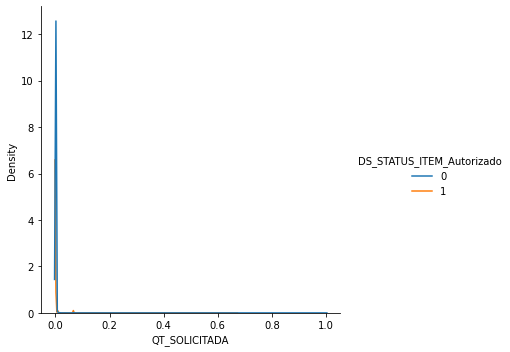

In [28]:
plt.figure(figsize=(8,12))
sns.displot(
    data=df_treino,x='QT_SOLICITADA',kind='kde',hue='DS_STATUS_ITEM_Autorizado'
)

## Exploracao de dados

(array([ 73143.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0., 153979.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

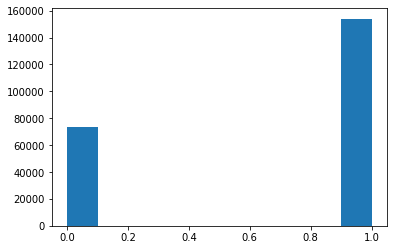

In [29]:
#Verificar o numero de aprovados e reprovados
plt.hist(df_treino['DS_STATUS_ITEM_Autorizado'])

Obs: Dados desbalanceados

## Criar modelo

* Decision Tree
* Random Forest

In [30]:
#PreProcessamento
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler

#Algoritmos
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree

#Metricas
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

In [31]:
x_treino, x_teste, y_treino, y_teste = train_test_split(
         df_treino.iloc[:, :-1], df_treino.iloc[:, -1],
         test_size=0.3, shuffle=True)

In [32]:
x_treino

,QT_DIA_SOLICITADO,QT_SOLICITADA,DS_TIPO_GUIA_Guia de solicitac?o SP/SADT,DS_TIPO_GUIA_Guia de solicitac?o de prorrogac?o de internac?o,DS_TIPO_GUIA_Guia de solicitac?o internac?o,DS_TIPO_PREST_SOLICITANTE_CLINICA,DS_TIPO_PREST_SOLICITANTE_CLINICA DE UROLOGIA,DS_TIPO_PREST_SOLICITANTE_CLINICA DE IMAGEM,DS_TIPO_PREST_SOLICITANTE_CLINICA DE RADIOLOGIA,DS_TIPO_PREST_SOLICITANTE_COOPERATIVA,...,DS_TIPO_ITEM_Procedimentos,DS_GRUPO_Brasindice,DS_GRUPO_DIARIAS,DS_GRUPO_PROCED. CIRURGICOS E INVASIVOS,DS_GRUPO_PROCED. CLINICOS,DS_GRUPO_PROCED. DIAGNOSTICOS E TERAPEUTICOS,DS_GRUPO_PROCED. GERAIS,DS_GRUPO_Simpro,DS_GRUPO_TAXAS,DS_GRUPO_TUSS
390232,0.000000,0.000000,1,0,0,1,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
391624,0.000000,0.000000,1,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
381988,0.000000,0.000000,1,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
380678,0.000000,0.000000,1,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
157212,0.090909,0.000007,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320541,0.018182,0.000000,0,0,1,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
39512,0.000000,0.000003,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
332617,0.000000,0.000002,1,0,0,1,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
217948,0.000000,0.000003,1,0,0,1,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0


In [33]:
#Modelo Random Forest
random_forest = RandomForestClassifier()

In [34]:
random_forest.fit(x_treino,y_treino)
y_pred_rf = random_forest.predict(x_teste)

In [35]:
print(classification_report(y_teste, y_pred_rf))

              precision    recall  f1-score   support

           0       0.61      0.23      0.34     21885
           1       0.72      0.93      0.81     46252

    accuracy                           0.71     68137
   macro avg       0.66      0.58      0.57     68137
weighted avg       0.68      0.71      0.66     68137



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


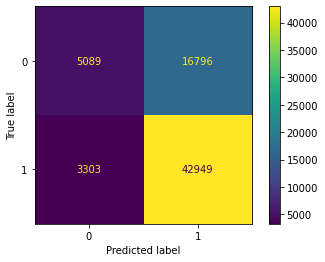

In [36]:
plot_confusion_matrix(random_forest,x_teste,y_teste)